### My first neural network implementation

##### Train a deep multilayer perceptron on the MNIST data set (you can load it using the keras.data sets.mnist.load_data() function). Try to get a precision of more than 98%. Try to find the optimal learning rate using the technique described in this chapter (i.e. exponentially increasing the value of the (i.e. exponentially increasing the value of the learning rate in each iteration, creating a graph of the loss function and finding the  point at which value of this function begins to increase). Try adding other features, such as saving checkpoints, early stopping try adding other features, such as saving control points, stopping early,


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
X_test.shape

(10000, 28, 28)

After dividing the dataset into train, valid and test sample, let's create my first neural network.

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
network = keras.models.Sequential()
network.add(keras.layers.Flatten(input_shape = [28, 28]))
network.add(keras.layers.Dense(300, activation = 'relu'))
network.add(keras.layers.Dense(10, activation = 'softmax'))

In [8]:
network.compile(loss = "sparse_categorical_crossentropy", 
                optimizer = "sgd", #backpropagation
                metrics=["accuracy"])

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = network.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6529 - accuracy: 0.8380 - val_loss: 0.3583 - val_accuracy: 0.9080
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3412 - accuracy: 0.9051 - val_loss: 0.2886 - val_accuracy: 0.9204
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2907 - accuracy: 0.9186 - val_loss: 0.2536 - val_accuracy: 0.9314
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2595 - accuracy: 0.9270 - val_loss: 0.2312 - val_accuracy: 0.9368
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2362 - accuracy: 0.9338 - val_loss: 0.2122 - val_accuracy: 0.9424
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2174 - accuracy: 0.9394 - val_loss: 0.1987 - val_accuracy: 0.9444
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2014 - accuracy: 0.9443 - val_loss: 0.1842 - val_accuracy:

The initial accuracy, at 20 epochs, is 0.9719. Let's illustrate this in the graph.

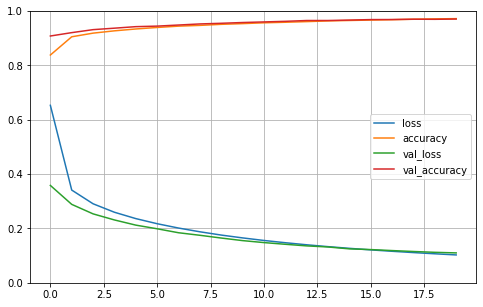

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

As I learn, I see that the accuracy for my data increased as the loss function decreased. However, it was not possible, in the first iteration, to get an accuracy greater than/equal to 0.98. Now I will play with some parameters and see what happens

#### Early stopping

In [12]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model_mnist.h5", save_best_only=True)

history_es = network.fit(X_train, y_train, epochs = 50,
                      validation_data = (X_valid, y_valid),
                      callbacks = [early_stopping_cb, checkpoint_cb],
                      verbose = 0 #don't print each epoch
                      )
                      
best_model = keras.models.load_model("my_model_mnist.h5") # Come back to the best model
best_model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9789


[0.06895820051431656, 0.9789000153541565]

For the best model, on my test dataset I reached a score higher than 0.98. Nevertheless, let's check also for the training data, how many models were above accuracy 0.98.

In [13]:
result = 0

for i in history_es.history["accuracy"]:

    if i > 0.98:
        result+=1

print(f'Total sum of epochs were accuracy was higher than 0.98 is {result}.')


Total sum of epochs were accuracy was higher than 0.98 is 41.


Of the 50 epochs, 13 of them had an accuracy greater than 0.98. Thus, the assumption from the task was met.

#### Learning rate

In [14]:
for lr in [0.005, 0.010, 0.1]:

    print(f'I am compiling my neural network for learning rate = {lr}')

    network.compile(loss="sparse_categorical_crossentropy", 
                    optimizer=keras.optimizers.SGD(learning_rate=lr),
                    metrics=["accuracy"])

    history_lr = network.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid))
    
    print("Evaluation for test dataset")
    network.evaluate(X_test, y_test)

    print("-"*30, end = "")
    print(f'End of compilation for learning rate = {lr}')

I am compiling my neural network for learning rate = 0.005
1719/1719 [==============================] - 5s 2ms/step - loss: 0.0280 - accuracy: 0.9946 - val_loss: 0.0644 - val_accuracy: 0.9814
Evaluation for test dataset
313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9789
------------------------------End of compilation for learning rate = 0.005
I am compiling my neural network for learning rate = 0.01
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9944 - val_loss: 0.0645 - val_accuracy: 0.9810
Evaluation for test dataset
313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9787
------------------------------End of compilation for learning rate = 0.01
I am compiling my neural network for learning rate = 0.1
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0417 - accuracy: 0.9877 - val_loss: 0.0710 - val_accuracy: 0.9774
Evaluation for test dataset
313/313 [=======

When changing the learning rate, accuracy of over 98% was also achieved. However, the best effect was obtained when oscillating around 5%.

#### Tuning of hyperparameters

Let's build a new neural network in which I will gain more control of some basic hyperparameters.

In [15]:
def neural_network_scikit_style(n_hidden=1, n_neurons=300, learning_rate=0.01, input_shape = [28,28]):
    neural_network_new = keras.models.Sequential()
    neural_network_new.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden): # basic NN with one hidden layout
        neural_network_new.add(keras.layers.Dense(n_neurons))
    neural_network_new.add(keras.layers.Dense(1, activation = 'softmax'))
    optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
    neural_network_new.compile(loss = "mse", optimizer=optimizer)
    return neural_network_new

In [16]:
# Indication to scikit learn
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(neural_network_scikit_style)

<ipython-input-16-b947a57c0e1e>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(neural_network_scikit_style)


In [17]:
keras_reg.fit(X_train, y_train, epochs=50,
                                validation_data=(X_valid, y_valid),
                                callbacks=[keras.callbacks.EarlyStopping(patience=10)])
scc_test = keras_reg.score(X_test, y_test)


Epoch 1/50
1719/1719 [==============================] - 8s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 4/50
1719/1719 [==============================] - 8s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 5/50
1719/1719 [==============================] - 8s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 6/50
1719/1719 [==============================] - 8s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 7/50
1719/1719 [==============================] - 7s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 8/50
1719/1719 [==============================] - 7s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 9/50
1719/1719 [==============================] - 7s 4ms/step - loss: 20.2782 - val_loss: 20.2682
Epoch 10/50
1719/1719 [==============================] - 7s 4ms/

In [19]:
# Tuning
param_distribs = {
 "n_hidden": [1, 2, 3],
 "n_neurons": [20,30,50,100],
 "learning_rate": [0.0001, 0.01, 0.10],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=30,
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/30
1146/1146 [==============================] - 5s 4ms/step - loss: 20.3133 - val_loss: 20.2682
Epoch 2/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.3133 - val_loss: 20.2682
Epoch 3/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.3133 - val_loss: 20.2682
Epoch 4/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.3133 - val_loss: 20.2682
Epoch 5/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.3133 - val_loss: 20.2682
Epoch 6/30
573/573 [==============================] - 1s 2ms/step - loss: 20.2081
Epoch 1/30
1146/1146 [==============================] - 4s 3ms/step - loss: 20.2618 - val_loss: 20.2682
Epoch 2/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.2618 - val_loss: 20.2682
Epoch 3/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.2618 - val_loss: 20.2682
Epoch 4/30
1146/1146 [==============================] - 3s 3ms/step - loss: 20.2618 - 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001F6750CEF70>,
                   param_distributions={'learning_rate': [0.0001, 0.01, 0.1],
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': [20, 30, 50, 100]})

In [20]:
rnd_search_cv.best_params_

{'n_neurons': 100, 'n_hidden': 1, 'learning_rate': 0.01}

In [21]:
rnd_search_cv.best_score_

-20.27823766072591